In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.decomposition import PCA
from sklearn.ensemble import BaggingClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
import xgboost as xgb
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [2]:
# Load the dataset
data = pd.read_csv('creditcard_2023.csv')

X = data.drop(['id', 'Class'], axis=1)
y = data['Class']

In [15]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [8]:
pca = PCA(n_components=0.85)

X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

In [9]:
# XGBoost model
xgb_model = xgb.XGBClassifier(objective='binary:logistic',
                              n_estimators=100,
                              subsample=0.8,
                              seed=42)

# Bagging Classifier
bagging_model = BaggingClassifier(estimator=xgb_model, n_estimators=10, random_state=42) # 10 parallel trees

In [ ]:
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Cross-validation scores
cv_scores = cross_val_score(bagging_model, X_train_pca, y_train, cv=kf, scoring='accuracy')

print(f"Cross-Validation Scores: {cv_scores}")
print(f"Mean CV Score: {np.mean(cv_scores):.4f}")


Cross-Validation Scores: [0.99947242 0.99958233 0.99942846 0.99956035 0.99945043 0.99929655
 0.99953836 0.99956034 0.99967026 0.99938448]
Mean CV Score: 0.9995


In [10]:
bagging_model.fit(X_train_pca, y_train)

train_predictions_bagging = bagging_model.predict(X_train_pca)

train_accuracy_bagging = accuracy_score(y_train, train_predictions_bagging)
print("Bagging Classifier Train Accuracy:", train_accuracy_bagging)

accuracy = bagging_model.score(X_test_pca, y_test)
print(f"Test Set Accuracy: {accuracy:.4f}")


Bagging Classifier Train Accuracy: 0.9991734519810773
Test Set Accuracy: 0.9985


In [17]:
bagging_model.fit(X_train, y_train)

train_predictions_bagging = bagging_model.predict(X_train)

train_accuracy_bagging = accuracy_score(y_train, train_predictions_bagging)
print("Bagging Classifier Train Accuracy:", train_accuracy_bagging)

accuracy = bagging_model.score(X_test, y_test)
print(f"Test Set Accuracy: {accuracy:.4f}")


Bagging Classifier Train Accuracy: 0.9999428450837979
Test Set Accuracy: 0.9998


In [11]:
test_predictions_bagging = bagging_model.predict(X_test_pca)

conf_matrix = confusion_matrix(y_test, test_predictions_bagging)
print("Confusion Matrix:")
print(conf_matrix)

class_report = classification_report(y_test, test_predictions_bagging)
print("Classification Report:")
print(class_report)

Confusion Matrix:
[[56598   152]
 [   15 56961]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56750
           1       1.00      1.00      1.00     56976

    accuracy                           1.00    113726
   macro avg       1.00      1.00      1.00    113726
weighted avg       1.00      1.00      1.00    113726



In [21]:
test_pred_nopca = bagging_model.predict(X_test)

conf_matrix = confusion_matrix(y_test, test_pred_nopca)
print("Confusion Matrix:")
print(conf_matrix)

class_report = classification_report(y_test, test_pred_nopca)
print("Classification Report:")
print(class_report)

Confusion Matrix:
[[56723    27]
 [    0 56976]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56750
           1       1.00      1.00      1.00     56976

    accuracy                           1.00    113726
   macro avg       1.00      1.00      1.00    113726
weighted avg       1.00      1.00      1.00    113726



KeyboardInterrupt: 

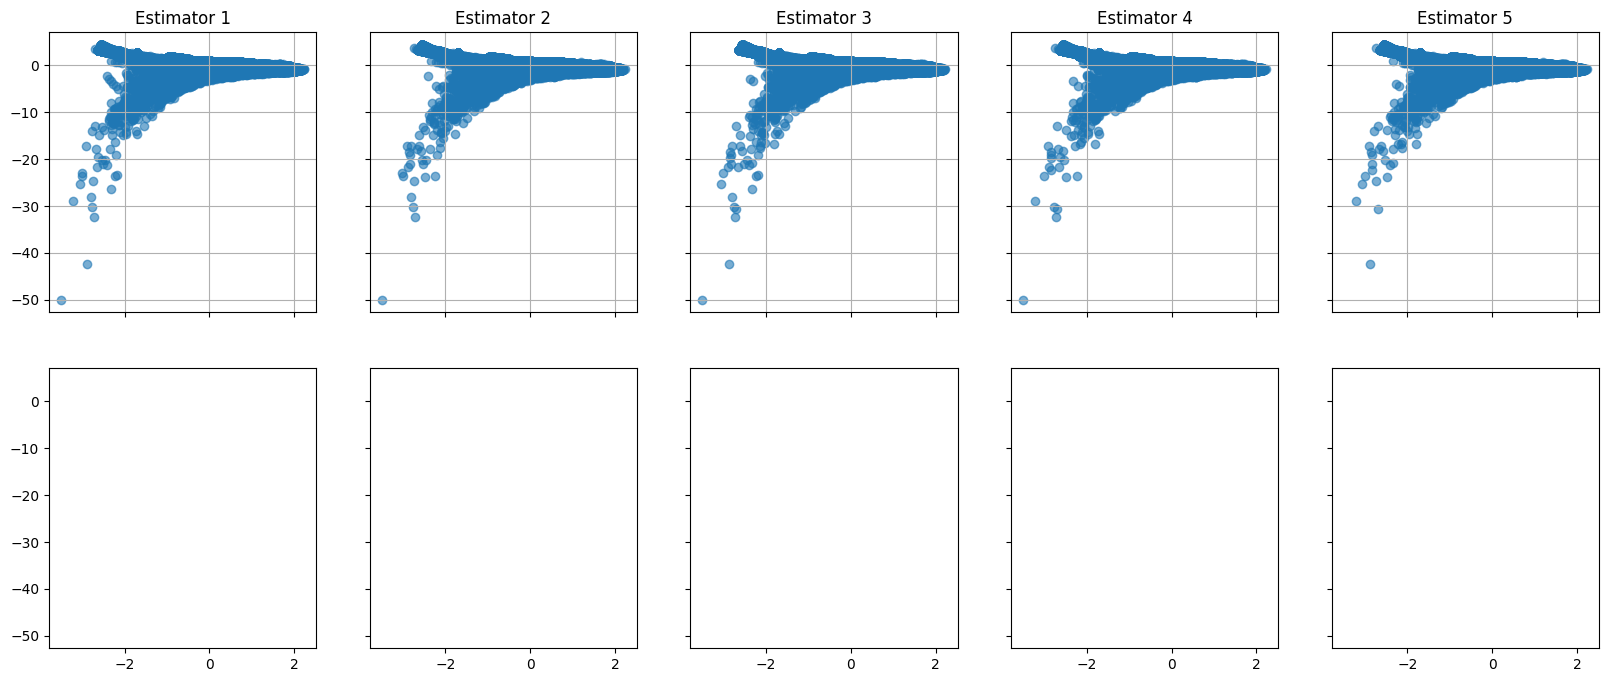

In [19]:
import matplotlib.pyplot as plt
import numpy as np

n_estimators = 10
np.random.seed(42)

fig, axs = plt.subplots(2, n_estimators // 2, figsize=(20, 8), sharex=True, sharey=True)

axs = axs.flatten()

for i in range(n_estimators):
    sample_indices = np.random.choice(range(len(X_train)), size=int(0.8 * len(X_train)), replace=True)
    xs, ys = zip(*[(x[0], x[1]) for idx, x in enumerate(X_train) if idx in sample_indices])

    axs[i].scatter(xs, ys, alpha=0.6)
    axs[i].set_title(f'Estimator {i+1}')
    axs[i].grid(True)

plt.suptitle('Bagging Process', fontsize=16)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


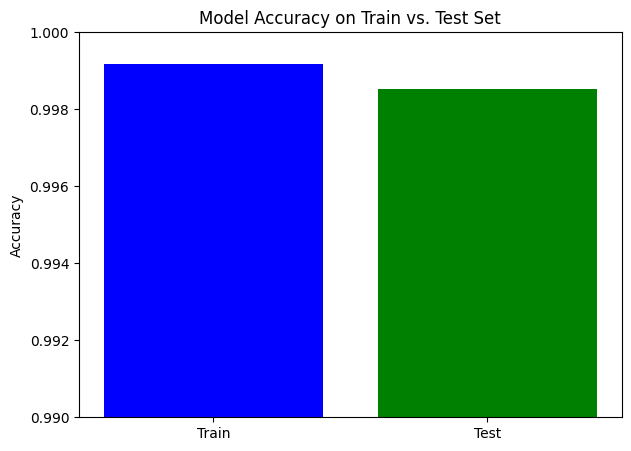

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score

accuracies = {'Train': train_accuracy_bagging, 'Test': accuracy}
plt.figure(figsize=(7, 5))
plt.bar(accuracies.keys(), accuracies.values(), color=['blue', 'green'])
plt.title('Model Accuracy on Train vs. Test Set')
plt.ylabel('Accuracy')
plt.ylim([0.99, 1])
plt.show()


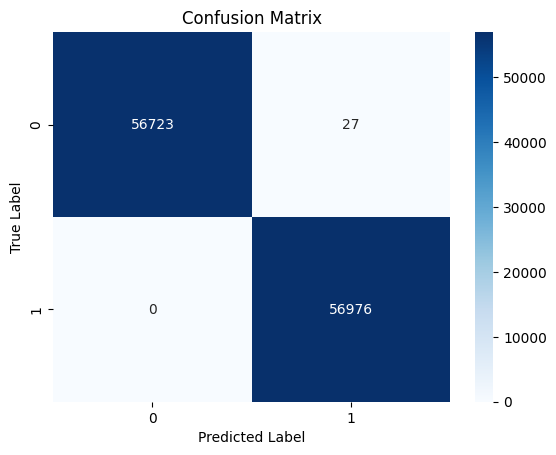

In [23]:
y_pred = bagging_model.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()
